## Problem Statement

In [57]:
# Importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [5]:
df.marital.replace({'married': 2, 'single': 1, 'divorced': 0}, inplace = True)

In [6]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [7]:
df.education.replace({'secondary': 2, 'tertiary': 3, 'primary': 1, 'unknown': 0}, inplace = True)

In [8]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [9]:
df.default.replace({'no': 0, 'yes': 1}, inplace = True)

In [10]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [11]:
df.housing.replace({'yes': 1, 'no': 0}, inplace = True)

In [12]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [13]:
df.loan.replace({'no': 0, 'yes': 1}, inplace = True)

In [14]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [15]:
df.contact.replace({'cellular': 1, 'unknown': 0, 'telephone': 2}, inplace = True)

In [16]:
df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [17]:
df.month.replace({'may': 5, 'jul': 7, 'aug': 8, 'jun': 6, 'nov': 11, 'apr': 4, 'feb': 2, 'jan': 1, 
                  'oct': 10, 'sep': 9, 'mar': 3, 'dec': 12} ,inplace = True)

In [18]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [19]:
df.poutcome.value_counts().to_dict()

{'unknown': 36959, 'failure': 4901, 'other': 1840, 'success': 1511}

In [20]:
df.poutcome.replace({'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  int64 
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  y          45211 non-null  object
dtypes: int64(15), object(2)
memory usage: 5.9+ MB


In [22]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [23]:
job = pd.get_dummies(df.job)
job

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
job1 = job.drop('unknown', axis = 1)
job1

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0
45207,0,0,0,0,0,1,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0


In [25]:
df1 = pd.concat([df, job1], axis = 1)
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,management,2,3,0,2143,1,0,0,5,...,0,0,0,1,0,0,0,0,0,0
1,44,technician,1,2,0,29,1,0,0,5,...,0,0,0,0,0,0,0,0,1,0
2,33,entrepreneur,2,2,0,2,1,1,0,5,...,0,1,0,0,0,0,0,0,0,0
3,47,blue-collar,2,0,0,1506,1,0,0,5,...,1,0,0,0,0,0,0,0,0,0
4,33,unknown,1,0,0,1,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,2,3,0,825,0,0,1,17,...,0,0,0,0,0,0,0,0,1,0
45207,71,retired,0,1,0,1729,0,0,1,17,...,0,0,0,0,1,0,0,0,0,0
45208,72,retired,2,2,0,5715,0,0,1,17,...,0,0,0,0,1,0,0,0,0,0
45209,57,blue-collar,2,2,0,668,0,0,2,17,...,1,0,0,0,0,0,0,0,0,0


In [26]:
df1.drop('job', axis = 1, inplace = True)

In [27]:
df1

,age,marital,education,default,balance,housing,loan,contact,day,month,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,2,3,0,2143,1,0,0,5,5,...,0,0,0,1,0,0,0,0,0,0
1,44,1,2,0,29,1,0,0,5,5,...,0,0,0,0,0,0,0,0,1,0
2,33,2,2,0,2,1,1,0,5,5,...,0,1,0,0,0,0,0,0,0,0
3,47,2,0,0,1506,1,0,0,5,5,...,1,0,0,0,0,0,0,0,0,0
4,33,1,0,0,1,0,0,0,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,3,0,825,0,0,1,17,11,...,0,0,0,0,0,0,0,0,1,0
45207,71,0,1,0,1729,0,0,1,17,11,...,0,0,0,0,1,0,0,0,0,0
45208,72,2,2,0,5715,0,0,1,17,11,...,0,0,0,0,1,0,0,0,0,0
45209,57,2,2,0,668,0,0,2,17,11,...,1,0,0,0,0,0,0,0,0,0


In [28]:
df1.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [29]:
df1.y.value_counts().to_dict()

{'no': 39922, 'yes': 5289}

In [30]:
df1.y.replace({'no': 0, 'yes': 1}, inplace = True)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45211 non-null  int64
 1   marital        45211 non-null  int64
 2   education      45211 non-null  int64
 3   default        45211 non-null  int64
 4   balance        45211 non-null  int64
 5   housing        45211 non-null  int64
 6   loan           45211 non-null  int64
 7   contact        45211 non-null  int64
 8   day            45211 non-null  int64
 9   month          45211 non-null  int64
 10  duration       45211 non-null  int64
 11  campaign       45211 non-null  int64
 12  pdays          45211 non-null  int64
 13  previous       45211 non-null  int64
 14  poutcome       45211 non-null  int64
 15  y              45211 non-null  int64
 16  admin.         45211 non-null  uint8
 17  blue-collar    45211 non-null  uint8
 18  entrepreneur   45211 non-null  uint8
 19  hous

In [32]:
df1.head().T

,0,1,2,3,4
age,58,44,33,47,33
marital,2,1,2,2,1
education,3,2,2,0,0
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,0,0,0,0,0
day,5,5,5,5,5
month,5,5,5,5,5


In [35]:
# Creating datasets for train-test-split

X = df1.drop('y', axis = 1)
y = df1.y

In [36]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 26)
(9043, 26)
(36168,)
(9043,)


In [37]:
model = LogisticRegression()

In [40]:
model.fit(X_train,y_train)

LogisticRegression()

In [41]:
# Evaluation of test data

y_pred_test = model.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred_test)

0.8928452947030853

In [43]:
confusion_matrix(y_test,y_pred_test)

array([[7777,  175],
       [ 794,  297]], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.63      0.27      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043



In [45]:
# Evaluation of training data

y_pred_train = model.predict(X_train)

In [46]:
accuracy_score(y_train,y_pred_train)

0.8960683477106834

In [47]:
confusion_matrix(y_train,y_pred_train)

array([[31288,   682],
       [ 3077,  1121]], dtype=int64)

In [48]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     31970
           1       0.62      0.27      0.37      4198

    accuracy                           0.90     36168
   macro avg       0.77      0.62      0.66     36168
weighted avg       0.88      0.90      0.88     36168



In [49]:
prob = model.predict_proba(X_test)

In [51]:
prob_1 = prob[:,1]
prob_1

array([0.0246186 , 0.05594622, 0.08045041, ..., 0.05685471, 0.04564077,
       0.05284909])

In [58]:
fpr,tpr, _ = roc_curve(y_test,prob_1)

<AxesSubplot:>

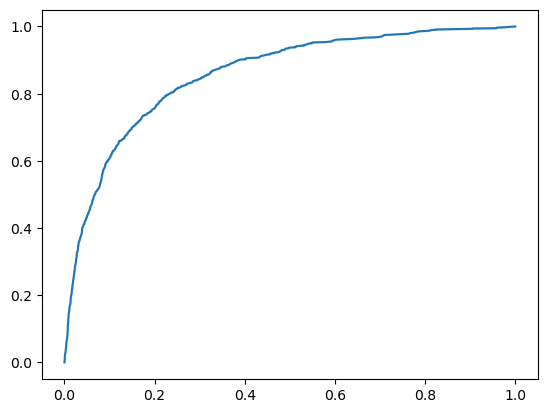

In [59]:
sns.lineplot(x = fpr, y = tpr)

In [60]:
roc_auc_score(y_test,prob_1)

0.8575936600353725

In [61]:
prob = model.predict_proba(X_train)

In [62]:
prob_1 = prob[:,1]
prob_1

array([0.02164018, 0.04321536, 0.03250963, ..., 0.10236491, 0.08643404,
       0.00257084])

In [64]:
fpr,tpr, _ = roc_curve(y_train,prob_1)

<AxesSubplot:>

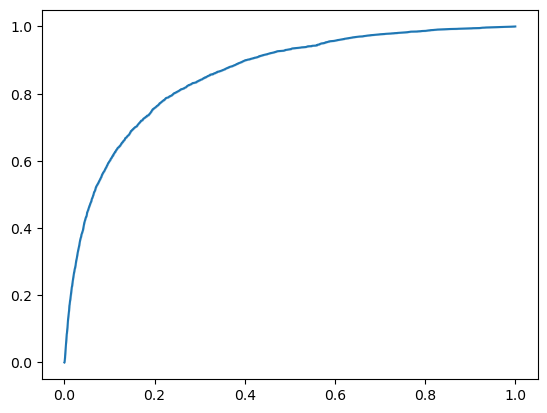

In [65]:
sns.lineplot(x = fpr, y = tpr)